In [ ]:
#!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
'''import torch
print("GPU Available:", torch.cuda.is_available())'''

GPU Available: False


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/2022dataset/clean_encoded_dataset.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_update = pd.read_csv(file_path)
data_update

,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,...,GeneralHealth,LastCheckupTime,AgeCategory,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,HeartConditionBinary
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,9,4.0,0.0,9.0,1.60,71.67,27.99,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,10,0.0,0.0,6.0,1.78,95.25,30.13,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,11,0.0,0.0,8.0,1.85,108.86,31.66,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,3,12,5.0,0.0,9.0,1.70,90.72,31.32,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,12,3.0,15.0,5.0,1.55,79.38,33.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,2,8,0.0,0.0,6.0,1.78,102.06,32.28,0
246009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,3,1,0.0,7.0,7.0,1.93,90.72,24.34,0
246010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,9,0.0,15.0,7.0,1.68,83.91,29.86,0
246011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,3,6,2.0,2.0,7.0,1.70,83.01,28.66,0


In [ ]:
data_update.duplicated().sum()

1

In [ ]:
duplicate_obs = data_update[data_update.duplicated(keep=False)]
duplicate_obs

,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,...,GeneralHealth,LastCheckupTime,AgeCategory,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,HeartConditionBinary
26387,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3,3,10,0.0,0.0,6.0,1.68,71.67,25.5,0
27736,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3,3,10,0.0,0.0,6.0,1.68,71.67,25.5,0


In [ ]:
data_copy1 = data_update.copy()
data_copy1 = data_update.drop_duplicates()

In [ ]:
data_copy1

,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,...,GeneralHealth,LastCheckupTime,AgeCategory,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,HeartConditionBinary
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,9,4.0,0.0,9.0,1.60,71.67,27.99,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,10,0.0,0.0,6.0,1.78,95.25,30.13,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,11,0.0,0.0,8.0,1.85,108.86,31.66,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,3,12,5.0,0.0,9.0,1.70,90.72,31.32,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,12,3.0,15.0,5.0,1.55,79.38,33.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,2,8,0.0,0.0,6.0,1.78,102.06,32.28,0
246009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,3,1,0.0,7.0,7.0,1.93,90.72,24.34,0
246010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,9,0.0,15.0,7.0,1.68,83.91,29.86,0
246011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,3,6,2.0,2.0,7.0,1.70,83.01,28.66,0


In [ ]:
selected_features = [
    'AgeCategory',  'GeneralHealth','ChestScan','HeartConditionBinary']
extracted_data = data_copy1[selected_features]
extracted_data

,AgeCategory,GeneralHealth,ChestScan,HeartConditionBinary
0,9,3,0,0
1,10,3,0,0
2,11,3,1,0
3,12,1,0,0
4,12,2,0,0
...,...,...,...,...
246008,8,3,0,0
246009,1,1,0,0
246010,9,2,0,0
246011,6,4,0,0


In [ ]:
sampled_data = extracted_data.sample(n=750, random_state=10)
sampled_data

,AgeCategory,GeneralHealth,ChestScan,HeartConditionBinary
185293,2,3,0,0
236426,9,3,0,0
25391,8,4,0,0
82985,4,1,0,1
163978,6,2,0,0
...,...,...,...,...
242506,6,3,0,0
72781,5,2,0,0
182898,5,3,0,0
87322,11,2,1,0


In [ ]:
response_counts = sampled_data["HeartConditionBinary"].value_counts()
response_counts

,count
HeartConditionBinary,
0,676
1,74


In [ ]:
from collections import Counter

class_counts = Counter(sampled_data["HeartConditionBinary"])

# Extract class counts dynamically
Nmaj = class_counts.get(0, 0)  # Count of class '0'
Nmin = class_counts.get(1, 0)  # Count of class '1'

# Compute Imbalance Ratio (IR) safely
IR = Nmaj / Nmin
IR

9.135135135135135

In [ ]:
#extracted_data.to_csv("top_15.csv", index=False)
#extracted_data.to_csv("/content/drive/My Drive/Colab Notebooks/2022dataset/top_15.csv", index=False)

In [ ]:
X = sampled_data.drop(columns=['HeartConditionBinary'])
y = sampled_data['HeartConditionBinary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
'''scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)'''

In [ ]:
class_weight= {1:9.135135135135135,0:1}

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# no weigth classical svm

In [ ]:
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=10)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Prediction Accuracy: {accuracy:.4f}")

Prediction Accuracy: 0.9333


In [ ]:
print("Classification Report no weight:\n")
print(classification_report(y_test, y_pred))

Classification Report no weight:

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       140
           1       0.00      0.00      0.00        10

    accuracy                           0.93       150
   macro avg       0.47      0.50      0.48       150
weighted avg       0.87      0.93      0.90       150



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# with weight classical svm

In [ ]:
svm_model_weight = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=10,class_weight=class_weight)
svm_model_weight.fit(X_train, y_train)

y_pred_weight = svm_model_weight.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_weight)
print(f"Prediction Accuracy: {accuracy:.4f}")

Prediction Accuracy: 0.7200


In [ ]:
svm_model_weight_poly = SVC(kernel="poly", C=1.0, gamma="scale", random_state=10,class_weight=class_weight)
svm_model_weight_poly.fit(X_train, y_train)

y_pred_weight_poly = svm_model_weight_poly.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_weight_poly)
print(f"Prediction Accuracy_poly: {accuracy:.4f}")

Prediction Accuracy_poly: 0.7867


In [ ]:
svm_model_weight_sigmoid = SVC(kernel="sigmoid", C=1.0, gamma="scale", random_state=10,class_weight=class_weight)
svm_model_weight_sigmoid.fit(X_train, y_train)

y_pred_weight_sigmoid = svm_model_weight_sigmoid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_weight_sigmoid)
print(f"Prediction Accuracy_sigmoid: {accuracy:.4f}")

Prediction Accuracy_sigmoid: 0.3200


In [ ]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred_weight))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.70      0.82       140
           1       0.19      1.00      0.32        10

    accuracy                           0.72       150
   macro avg       0.60      0.85      0.57       150
weighted avg       0.95      0.72      0.79       150



In [ ]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred_weight_poly))

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.79      0.87       140
           1       0.21      0.80      0.33        10

    accuracy                           0.79       150
   macro avg       0.60      0.79      0.60       150
weighted avg       0.93      0.79      0.84       150



In [ ]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred_weight_sigmoid))

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.30      0.45       140
           1       0.06      0.60      0.11        10

    accuracy                           0.32       150
   macro avg       0.49      0.45      0.28       150
weighted avg       0.86      0.32      0.43       150



In [ ]:
!pip install qiskit
!pip install qiskit-machine-learning
!pip install qiskit-aer
#!pip install qiskit-aer-gpu

In [ ]:
'''!pip install qiskit-aer-gpu
!pip install qiskit-aer'''

'!pip install qiskit-aer-gpu\n!pip install qiskit-aer'

In [ ]:
'''from qiskit_aer import Aer

print("Available Qiskit Aer Backends:")
print(Aer.backends())'''

'from qiskit_aer import Aer\n\nprint("Available Qiskit Aer Backends:")\nprint(Aer.backends())'

In [ ]:
import qiskit_machine_learning
from qiskit_aer import Aer
from qiskit_machine_learning.utils import algorithm_globals
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.primitives import StatevectorSampler

feature_map = ZZFeatureMap(feature_dimension=X_train.shape[1], reps=2, entanglement='linear')
quantum_kernel = FidelityQuantumKernel()
qsvc = QSVC(quantum_kernel=quantum_kernel,class_weight=class_weight)
qsvc.fit(X_train, y_train)
y_pred_qsvm = qsvc.predict(X_test)
qsvm_accuracy = accuracy_score(y_test, y_pred_qsvm)
print(f"Quantum SVM Accuracy: {qsvm_accuracy:.2%}")

In [ ]:
!pip install qiskit-aerimport qiskit
import qiskit_machine_learning
from qiskit_aer import Aer
from qiskit_machine_learning.utils import algorithm_globals
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.primitives import StatevectorSampler


ERROR: Could not find a version that satisfies the requirement qiskit-aerimport (from versions: none)
ERROR: No matching distribution found for qiskit-aerimport


In [ ]:
feature_map = ZZFeatureMap(feature_dimension=X_train.shape[1], reps=2, entanglement='linear')

In [ ]:
#quantum_backend = Aer.get_backend("aer_simulator_statevector_gpu")

In [ ]:
quantum_kernel = FidelityQuantumKernel()

In [ ]:
qsvc = QSVC(quantum_kernel=quantum_kernel,class_weight=class_weight)

In [ ]:
qsvc.fit(X_train, y_train)

QSVC(C=1.0, break_ties=False, cache_size=200,
     class_weight={0: 1, 1: 9.135135135135135}, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x7b1a8227e250>,
     random_state=None, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred_qsvm = qsvc.predict(X_test)

In [ ]:
qsvm_accuracy = accuracy_score(y_test, y_pred_qsvm)
print(f"Quantum SVM Accuracy: {qsvm_accuracy:.2%}")

Quantum SVM Accuracy: 60.00%


In [ ]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred_qsvm))

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.58      0.73       140
           1       0.13      0.90      0.23        10

    accuracy                           0.60       150
   macro avg       0.56      0.74      0.48       150
weighted avg       0.93      0.60      0.70       150



#plot


In [ ]:
import pandas as pd

# Create the dataframe from the extracted text
data = {
    'sample_size': [500, 750, 1000],
    'rbf_F1_1': [0.4, 0.32, 0.44],
    'sigmoid_F1_1': [0.24, 0.11, 0.13],
    'poly_F1_1': [0.4, 0.33, 0.38],
    'qsvm_F1_1': [0.19, 0.23, 0.33],
    'rbf_F1_0': [0.83, 0.82, 0.87],
    'sigmoid_F1_0': [0.74, 0.45, 0.48],
    'poly_F1_0': [0.89, 0.87, 0.89],
    'qsvm_F1_0': [0.78, 0.73, 0.81],
    'rbf_Accuracy': [0.73, 0.72, 0.8],
    'sigmoid_Accuracy': [0.61, 0.32, 0.35],
    'poly_Accuracy': [0.82, 0.7867, 0.82],
    'qsvm_Accuracy': [0.66, 0.6, 0.7]
}

df = pd.DataFrame(data)
print(df)


   sample_size  rbf_F1_1  sigmoid_F1_1  poly_F1_1  qsvm_F1_1  rbf_F1_0  \
0          500      0.40          0.24       0.40       0.19      0.83   
1          750      0.32          0.11       0.33       0.23      0.82   
2         1000      0.44          0.13       0.38       0.33      0.87   

   sigmoid_F1_0  poly_F1_0  qsvm_F1_0  rbf_Accuracy  sigmoid_Accuracy  \
0          0.74       0.89       0.78          0.73              0.61   
1          0.45       0.87       0.73          0.72              0.32   
2          0.48       0.89       0.81          0.80              0.35   

   poly_Accuracy  qsvm_Accuracy  
0         0.8200           0.66  
1         0.7867           0.60  
2         0.8200           0.70  


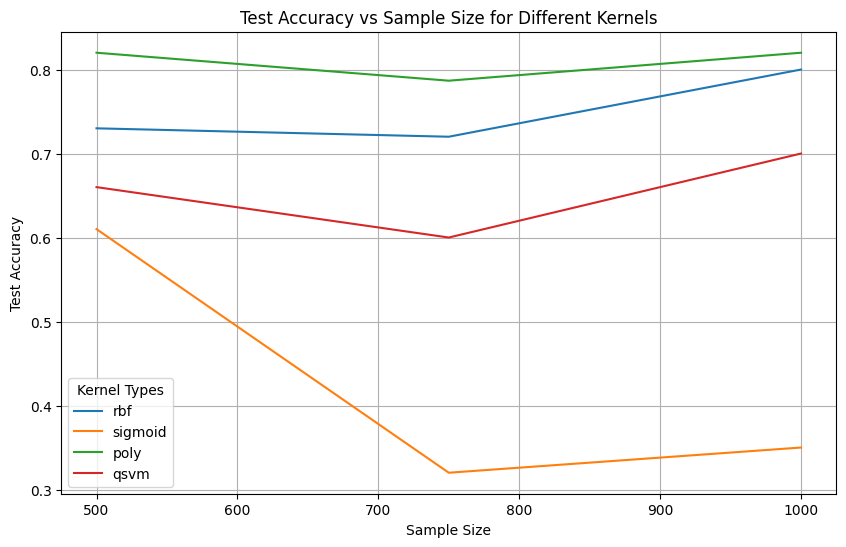

In [ ]:
import matplotlib.pyplot as plt

sample_sizes = [500, 750, 1000]
kernels = ['rbf', 'sigmoid', 'poly', 'qsvm']

plt.figure(figsize=(10, 6))

for kernel in kernels:
    plt.plot(sample_sizes, df[f'{kernel}_Accuracy'], label=kernel)

plt.xlabel('Sample Size')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Sample Size for Different Kernels')
plt.legend(title="Kernel Types")
plt.grid(True)
plt.show()


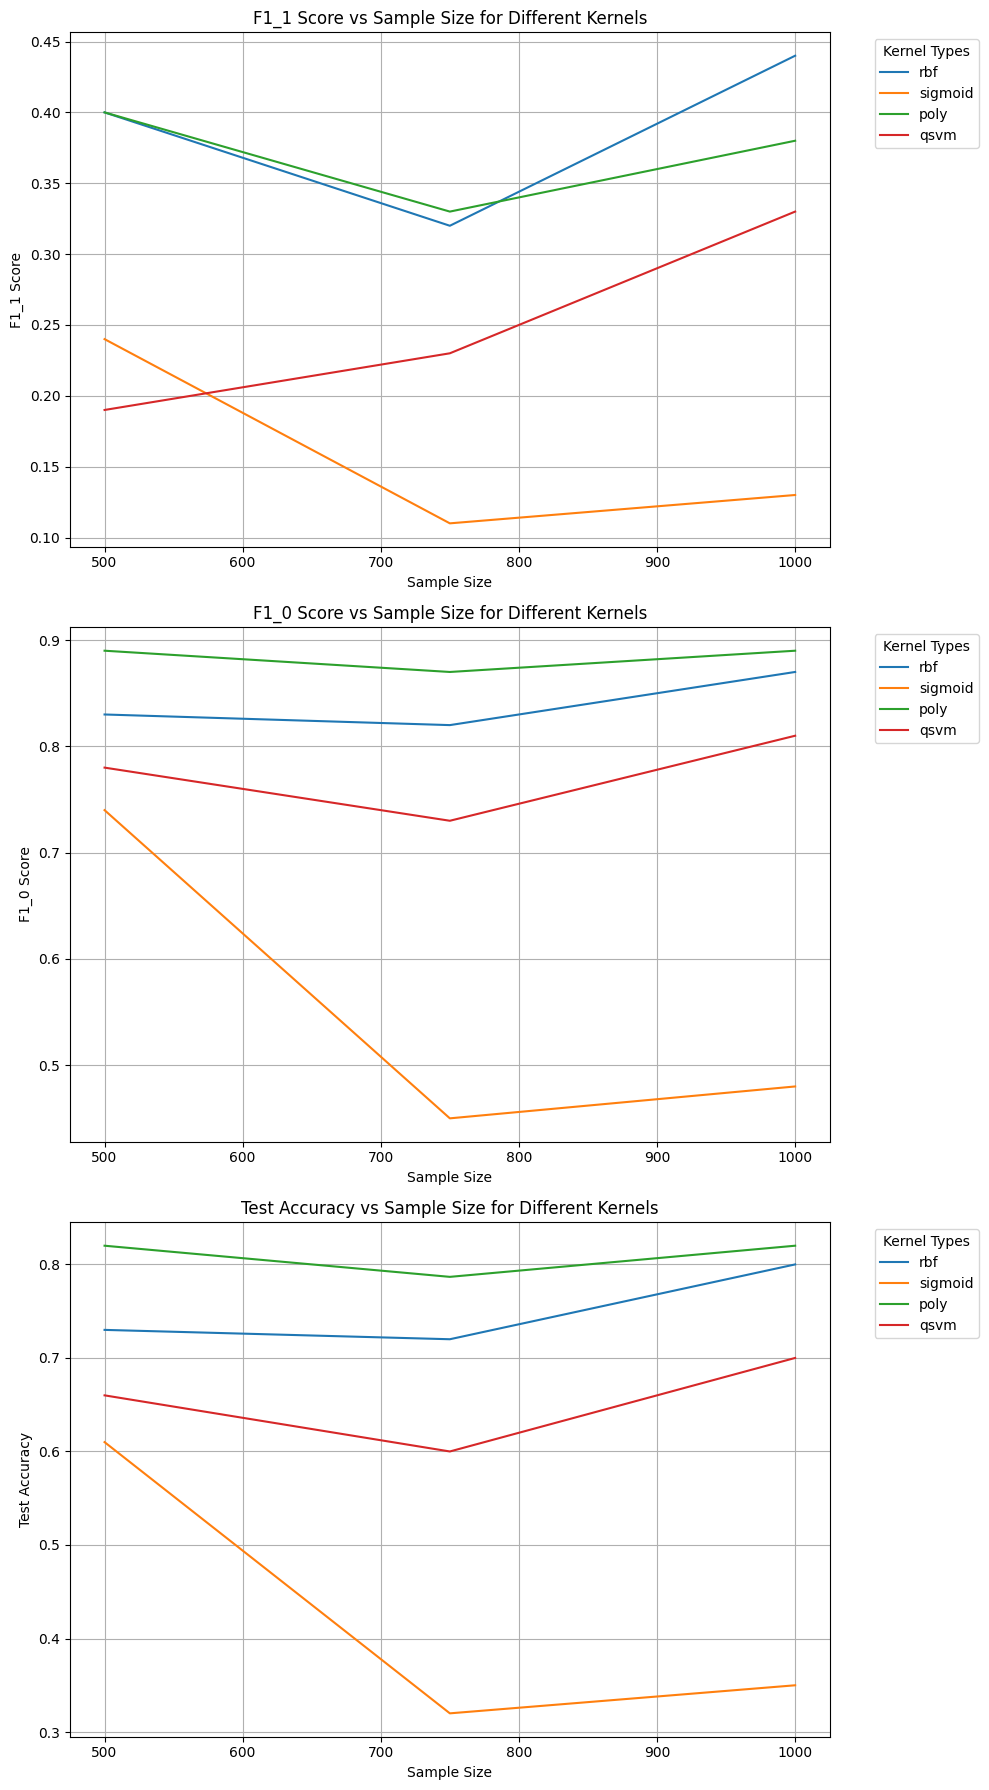

In [ ]:
import matplotlib.pyplot as plt

# Sample sizes
sample_sizes = [500, 750, 1000]

# Kernels
kernels = ['rbf', 'sigmoid', 'poly', 'qsvm']

# Create a figure with subplots for each metric
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot F1_1 scores for each kernel
for kernel in kernels:
    axs[0].plot(sample_sizes, df[f'{kernel}_F1_1'], label=kernel)
axs[0].set_xlabel('Sample Size')
axs[0].set_ylabel('F1_1 Score')
axs[0].set_title('F1_1 Score vs Sample Size for Different Kernels')
axs[0].legend(title="Kernel Types", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].grid(True)

# Plot F1_0 scores for each kernel
for kernel in kernels:
    axs[1].plot(sample_sizes, df[f'{kernel}_F1_0'], label=kernel)
axs[1].set_xlabel('Sample Size')
axs[1].set_ylabel('F1_0 Score')
axs[1].set_title('F1_0 Score vs Sample Size for Different Kernels')
axs[1].legend(title="Kernel Types", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].grid(True)

# Plot Test Accuracy for each kernel
for kernel in kernels:
    axs[2].plot(sample_sizes, df[f'{kernel}_Accuracy'], label=kernel)
axs[2].set_xlabel('Sample Size')
axs[2].set_ylabel('Test Accuracy')
axs[2].set_title('Test Accuracy vs Sample Size for Different Kernels')
axs[2].legend(title="Kernel Types", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[2].grid(True)

# Adjust layout to make space for the legend
plt.tight_layout()
plt.show()


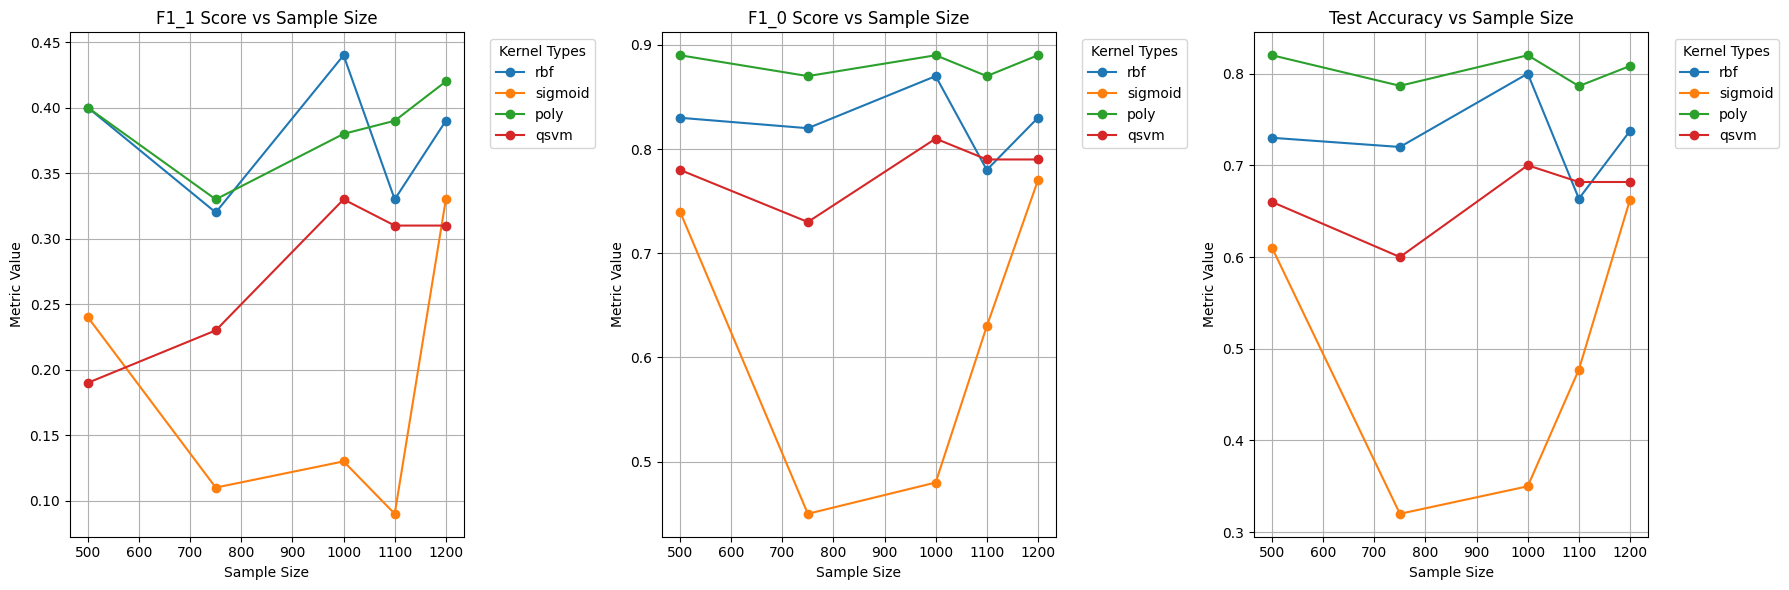

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample sizes
sample_sizes = [500, 750, 1000,1100,1200]

# Kernels
kernels = ['rbf', 'sigmoid', 'poly', 'qsvm']

# Data for F1_1, F1_0, and Test Accuracy for each kernel and sample size
data = {
    'rbf': {
        'F1_1': [0.4, 0.32, 0.44,0.33,0.39],
        'F1_0': [0.83, 0.82, 0.87,0.78,0.83],
        'Accuracy': [0.73, 0.72, 0.8,0.6636,0.7375]
    },
    'sigmoid': {
        'F1_1': [0.24, 0.11, 0.13,0.09,0.33],
        'F1_0': [0.74, 0.45, 0.48,0.63,0.77],
        'Accuracy': [0.61, 0.32, 0.35,0.4773,0.6625]
    },
    'poly': {
        'F1_1': [0.4, 0.33, 0.38,0.39,0.42],
        'F1_0': [0.89, 0.87, 0.89,0.87,0.89],
        'Accuracy': [0.82, 0.7867, 0.82,0.7864,0.8083]
    },
    'qsvm': {
        'F1_1': [0.19, 0.23, 0.33,0.31,0.31],
        'F1_0': [0.78, 0.73, 0.81,0.79,0.79],
        'Accuracy': [0.66, 0.6, 0.7,0.6818,0.6818]
    }
}

# Set up the figure with three subplots (one row, three columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Define the metrics to plot
metrics = ['F1_1', 'F1_0', 'Accuracy']
metric_labels = ['F1_1 Score', 'F1_0 Score', 'Test Accuracy']

# Loop through each metric and create the plot
for i, metric in enumerate(metrics):
    # Loop through each kernel and plot its data for the given metric
    for kernel in kernels:
        axs[i].plot(sample_sizes, data[kernel][metric], label=kernel, marker='o')

    # Set title, labels, and legend for each subplot
    axs[i].set_title(f'{metric_labels[i]} vs Sample Size')
    axs[i].set_xlabel('Sample Size')
    axs[i].set_ylabel('Metric Value')
    axs[i].legend(title="Kernel Types", bbox_to_anchor=(1.05, 1), loc='upper left')
    axs[i].grid(True)

# Adjust layout to make space for the legend
plt.tight_layout()

# Show the plot
plt.show()


